<a href="https://colab.research.google.com/github/ntalithap/Machine-Learning-Final/blob/main/H071201005_Final_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Data & Library Python

In [34]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [35]:
# Read CSV train data file into DataFrame
df = pd.read_csv("Titanic.csv")

In [36]:
# Preview dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Dataset Explanation



1.   PassengerId, menunjukkan nomor id penumpang
2.   Survived, menunjukkan penumpang selamat atau tidak (0=tidak, 1=selamat)
2.   Pclass, menunjukkan class tiket penumpang
3.   Name, menunjukkan nama penumpang
4.   Sex, menunjukkan gender penumpan
5.   Age, menunjukkan umur penumpang
6.   SibSp, menunjukkan jumlah saudara/pasangan di kapal
7.   Parch, menunjukkan jumlah orang tua/anak di kapal
8.   Ticket, menunjukkan nomor tiket
9.   Fare, menunjukkan tarif penumpang
10.  Cabin, menunjukkan cabin penumpang
11.  Embarked, menunjukkan pelabuhan tempat berangkat (C = Cherbourg; Q = Queenstown; S = Southampton)



Kelas target pada dataset ini adalah kolom ‘Survived‘ sedangkan kolom lainnya adalah sebagai feature untuk menentukan apakah penumpang selamat atau tidak

## Data Quality & Missing Value Assessment

In [37]:
# Mengecek Missing Value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Missinge Value Age

In [38]:
# Persentase missing value age
print('Persentase missing value age adalah %.2f%%' %((df['Age'].isnull().sum()/df.shape[0])*100))

Persentase missing value age adalah 19.87%


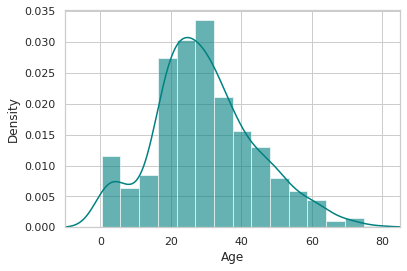

In [39]:
# Melihat grafik age
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [40]:
# mean age
print('The mean of "Age" is %.2f' %(df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(df["Age"].median(skipna=True)))

The mean of "Age" is 29.70
The median of "Age" is 28.00


### Missing Value Cabin

In [41]:
# Persentase missing value cabin
print('Persentase missing value cabin adalah %.2f%%' %((df['Cabin'].isnull().sum()/df.shape[0])*100))

Persentase missing value cabin adalah 77.10%


77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

### Missing Value Embarked

In [42]:
# Persentase missing value embarked
print('Persentase missing value embarked adalah %.2f%%' %((df['Embarked'].isnull().sum()/df.shape[0])*100))

Persentase missing value embarked adalah 0.22%


There are only 2 (0.22%) missing values for "Embarked", so we can just impute with the port where most people boarded.

Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


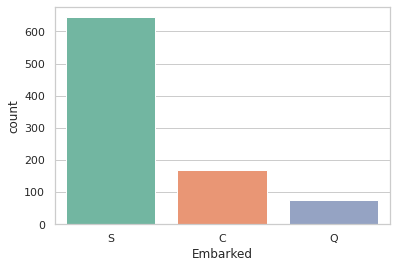

In [43]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=df, palette='Set2')
plt.show()

In [44]:
print('The most common boarding port of embarkation is %s.' %df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


By far the most passengers boarded in Southampton, so we'll impute those 2 NaN's w/ "S".

### Drop & Fill Missing

Lalu, selanjutnya kita akan menghapus kolom yang tidak digunakan seperti 'PassengerId', 'Name', 'Ticket', dan kolom yang memiliki banyak missing value yaitu 'Cabin'

In [45]:
df.drop(['PassengerId','Name','Ticket','Cabin'], inplace=True, axis=1)

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:
*   If "Age" is missing for a given row, I'll impute with 28 (median age).
*   If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port).

In [46]:
data = df.copy()
data["Age"].fillna(df["Age"].median(skipna=True), inplace=True)
data["Embarked"].fillna(df['Embarked'].value_counts().idxmax(), inplace=True)

In [47]:
# Mengecek Kembali Missing Value
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

According to the Kaggle data dictionary, both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [49]:
# Create categorical variable for traveling alone
data['TravelAlone']=np.where((data["SibSp"]+data["Parch"])>0, 0, 1)
data.drop('SibSp', axis=1, inplace=True)
data.drop('Parch', axis=1, inplace=True)

Create categorical variables for Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked")

In [50]:
#create categorical variables and drop some variables
training=pd.get_dummies(data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)

final_data = training
final_data.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


## Explore Data

### Age

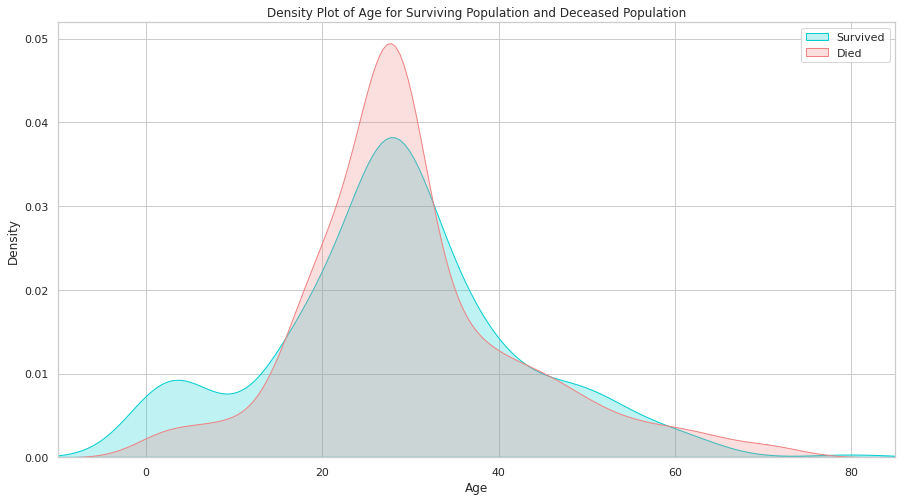

In [55]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_data["Age"][final_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_data["Age"][final_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

The age distribution for survivors and deceased is actually very similar. One notable difference is that, of the survivors, a larger proportion were children. The passengers evidently made an attempt to save children by giving them a place on the life rafts.

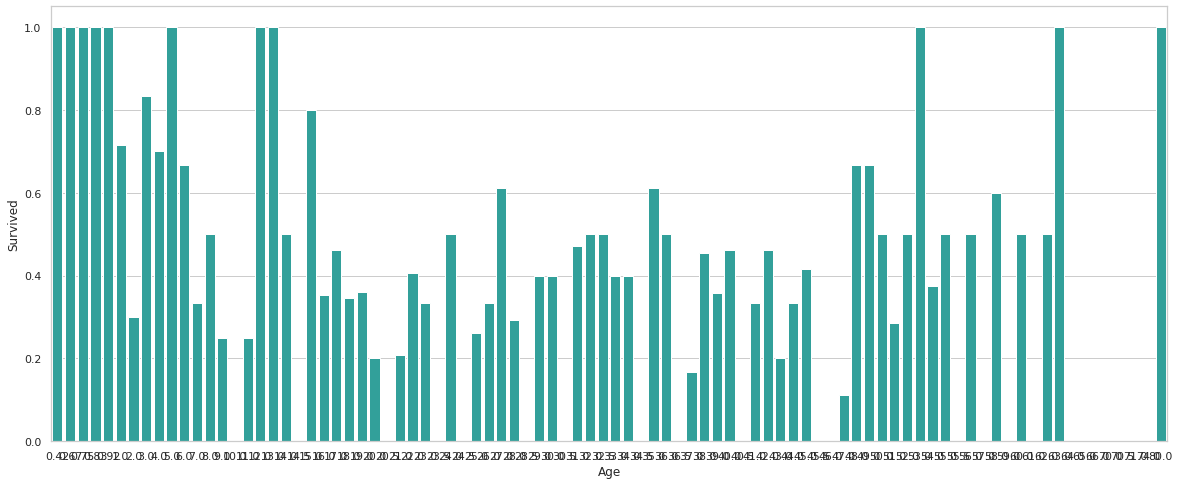

In [56]:
plt.figure(figsize=(20,8))
avg_survival_byage = final_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean()
g = sns.barplot(x='Age', y='Survived', data=avg_survival_byage, color="LightSeaGreen")
plt.show()

Considering the survival rate of passengers under 16, I'll also include another categorical variable in my dataset: "Minor"

In [57]:
final_data['IsMinor']=np.where(final_data['Age']<=16, 1, 0)

### Fare

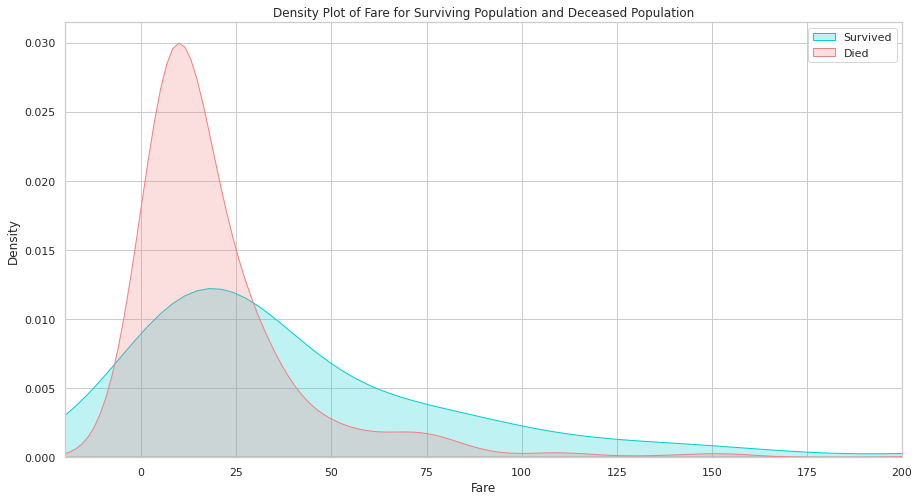

In [58]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_data["Fare"][final_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_data["Fare"][final_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next.

### Passenger Class

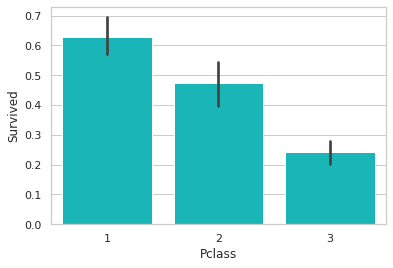

In [60]:
sns.barplot('Pclass', 'Survived', data=df, color="darkturquoise")
plt.show()

Unsurprisingly, being a first class passenger was safest

### Embarked

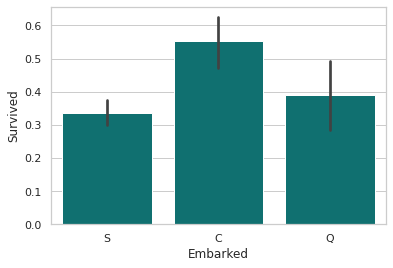

In [61]:
sns.barplot('Embarked', 'Survived', data=df, color="teal")
plt.show()

Passengers who boarded in Cherbourg, France, appear to have the highest survival rate. Passengers who boarded in Southhampton were marginally less likely to survive than those who boarded in Queenstown. This is probably related to passenger class, or maybe even the order of room assignments (e.g. maybe earlier passengers were more likely to have rooms closer to deck).
It's also worth noting the size of the whiskers in these plots. Because the number of passengers who boarded at Southhampton was highest, the confidence around the survival rate is the highest. The whisker of the Queenstown plot includes the Southhampton average, as well as the lower bound of its whisker. It's possible that Queenstown passengers were equally, or even more, ill-fated than their Southhampton counterparts.

### Traveling Alone vs. With Family

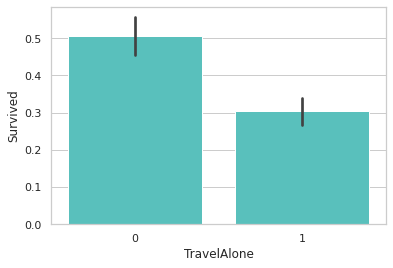

In [62]:
sns.barplot('TravelAlone', 'Survived', data=final_data, color="mediumturquoise")
plt.show()

Individuals traveling without family were more likely to die in the disaster than those with family aboard. Given the era, it's likely that individuals traveling alone were likely male.

### Gender

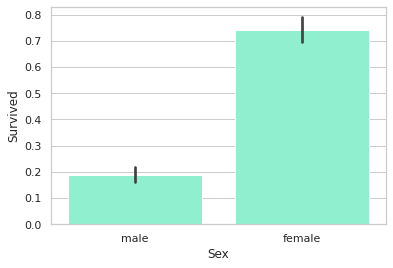

In [64]:
sns.barplot('Sex', 'Survived', data=df, color="aquamarine")
plt.show()

This is a very obvious difference. Clearly being female greatly increased your chances of survival.

## Feature Selection

### Recursive Feature Elimination and Cross-Validation

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 9
Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


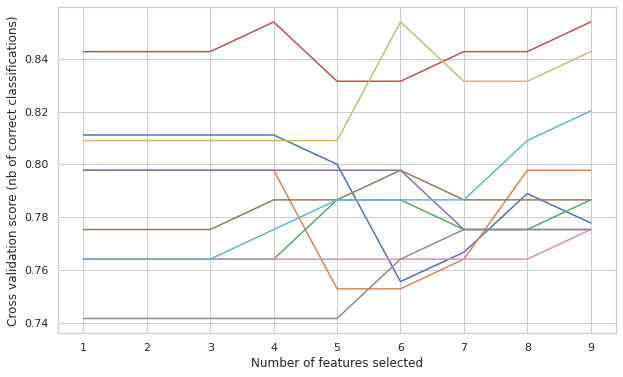

In [68]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

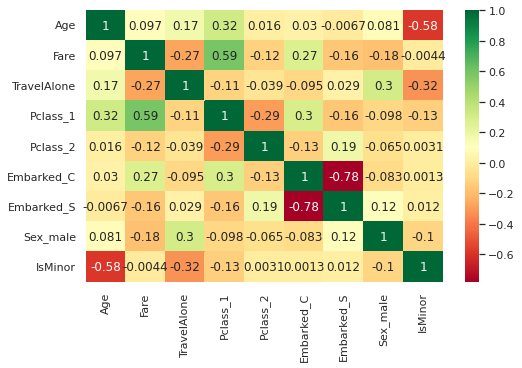

In [72]:
Selected_features = ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 
                     'Embarked_S', 'Sex_male', 'IsMinor']
X = final_data[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

## Model Evaluation

In [73]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_data[Selected_features]
y = final_data['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.771
LogisticRegression log_loss is 0.506
LogisticRegression auc is 0.839
